In [84]:
#This is a sentiment analysis program that parses the tweet fetched from twitter.

IMPORTATION

In [85]:
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import nltk
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

DATA PREPROCESSING

In [86]:
df = pd.read_csv("training.1600000.processed.noemoticon.csv")
df.head()

,Label,User_ID,Date & Time,Query,Username,Tweet
0,1,1467811672,Mon Apr 16 22:19:49 PDT 2119,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,1,1467811917,Mon Apr 16 22:19:53 PDT 2119,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,1,1467811184,Mon Apr 16 22:19:57 PDT 2119,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,1,1467811193,Mon Apr 16 22:19:57 PDT 2119,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,1,1467811372,Mon Apr 16 22:21:11 PDT 2119,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   Label        1048575 non-null  int64 
 1   User_ID      1048575 non-null  int64 
 2   Date & Time  1048575 non-null  object
 3   Query        1048575 non-null  object
 4   Username     1048575 non-null  object
 5   Tweet        1048575 non-null  object
dtypes: int64(2), object(4)
memory usage: 48.0+ MB


In [88]:
def remove_pattern(input_text, pattern):
    r = re.findall(pattern, input_text)
    for word in r:
        input_text = re.sub(word, '', input_text)
    return input_text    


In [89]:
df.head()


,Label,User_ID,Date & Time,Query,Username,Tweet
0,1,1467811672,Mon Apr 16 22:19:49 PDT 2119,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,1,1467811917,Mon Apr 16 22:19:53 PDT 2119,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,1,1467811184,Mon Apr 16 22:19:57 PDT 2119,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,1,1467811193,Mon Apr 16 22:19:57 PDT 2119,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,1,1467811372,Mon Apr 16 22:21:11 PDT 2119,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [90]:
df['clean_text'] = df['Tweet'].str.replace("[^a-zA-Z#]", " ")
df.head()

,Label,User_ID,Date & Time,Query,Username,Tweet,clean_text
0,1,1467811672,Mon Apr 16 22:19:49 PDT 2119,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he can t update his Facebook by ...
1,1,1467811917,Mon Apr 16 22:19:53 PDT 2119,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,Kenichan I dived many times for the ball Man...
2,1,1467811184,Mon Apr 16 22:19:57 PDT 2119,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
3,1,1467811193,Mon Apr 16 22:19:57 PDT 2119,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass no it s not behaving at all ...
4,1,1467811372,Mon Apr 16 22:21:11 PDT 2119,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,Kwesidei not the whole crew


In [91]:
#Converting the column in string
df['clean_text'] = df['clean_text'].astype(str)

In [92]:
#Done to remove the words of length less than 3
df['clean_text'] = df['clean_text'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,Label,User_ID,Date & Time,Query,Username,Tweet,clean_text
0,1,1467811672,Mon Apr 16 22:19:49 PDT 2119,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset that update Facebook texting might resul...
1,1,1467811917,Mon Apr 16 22:19:53 PDT 2119,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,Kenichan dived many times ball Managed save re...
2,1,1467811184,Mon Apr 16 22:19:57 PDT 2119,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole body feels itchy like fire
3,1,1467811193,Mon Apr 16 22:19:57 PDT 2119,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behaving here because over there
4,1,1467811372,Mon Apr 16 22:21:11 PDT 2119,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,Kwesidei whole crew


In [93]:
#individual words considered as tokens.
tokenized_tweet = df['clean_text'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [upset, that, update, Facebook, texting, might...
1    [Kenichan, dived, many, times, ball, Managed, ...
2              [whole, body, feels, itchy, like, fire]
3    [nationwideclass, behaving, here, because, ove...
4                              [Kwesidei, whole, crew]
Name: clean_text, dtype: object

In [94]:
#Stem the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(word) for word in x ])
tokenized_tweet.head()

0    [upset, that, updat, facebook, text, might, re...
1    [kenichan, dive, mani, time, ball, manag, save...
2               [whole, bodi, feel, itchi, like, fire]
3    [nationwideclass, behav, here, becaus, over, t...
4                              [kwesidei, whole, crew]
Name: clean_text, dtype: object

In [95]:
#combine into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])

df['clean_text'] = tokenized_tweet 
df.head()  

,Label,User_ID,Date & Time,Query,Username,Tweet,clean_text
0,1,1467811672,Mon Apr 16 22:19:49 PDT 2119,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset that updat facebook text might result sc...
1,1,1467811917,Mon Apr 16 22:19:53 PDT 2119,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dive mani time ball manag save rest b...
2,1,1467811184,Mon Apr 16 22:19:57 PDT 2119,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
3,1,1467811193,Mon Apr 16 22:19:57 PDT 2119,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behav here becaus over there
4,1,1467811372,Mon Apr 16 22:21:11 PDT 2119,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,kwesidei whole crew


DATA ANALYSIS

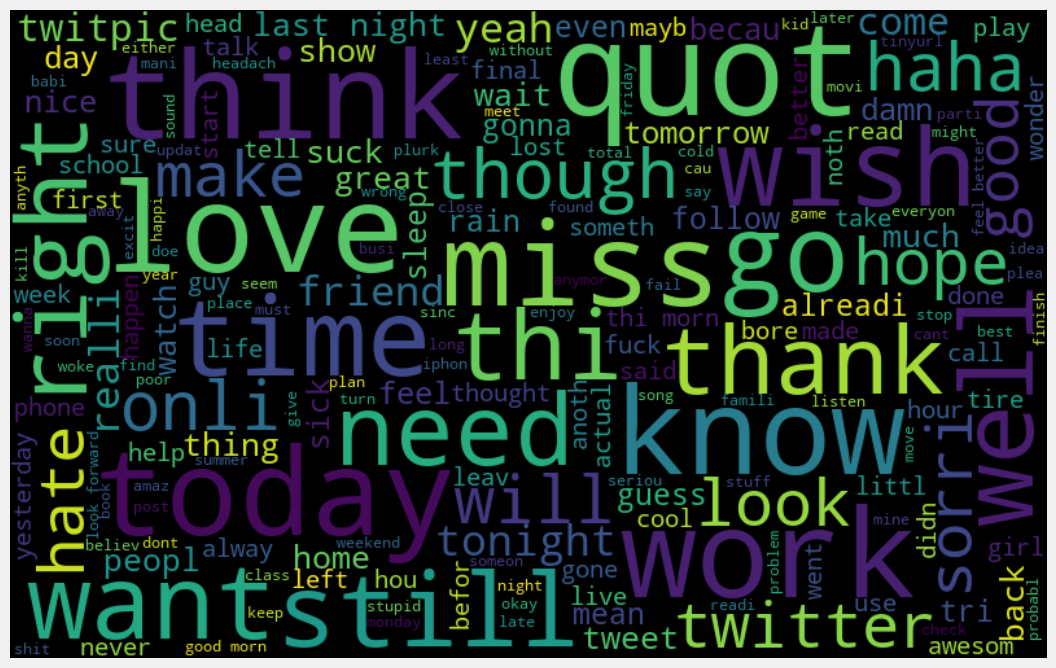

In [96]:
#visualization of frequent words
all_word = " ".join([x for x in df['clean_text']])

#Bigger the words more frequent they are
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_word)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

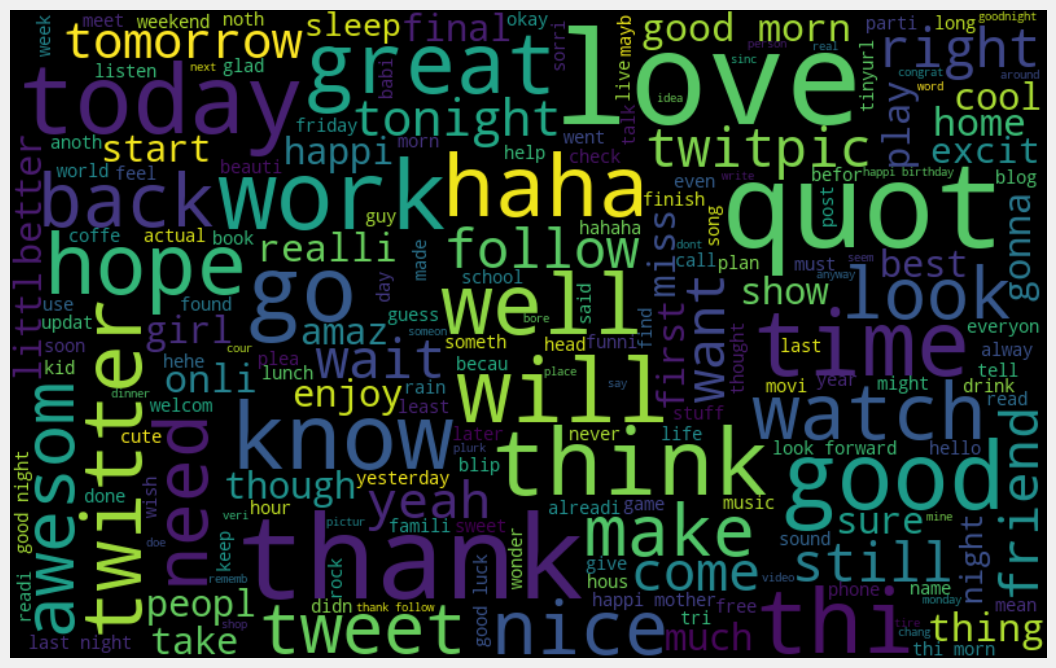

In [97]:
#frequnet word visualization for positive words
all_word = " ".join([x for x in df['clean_text'][df['Label']==0]])

#Bigger the words more frequent they are
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_word)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


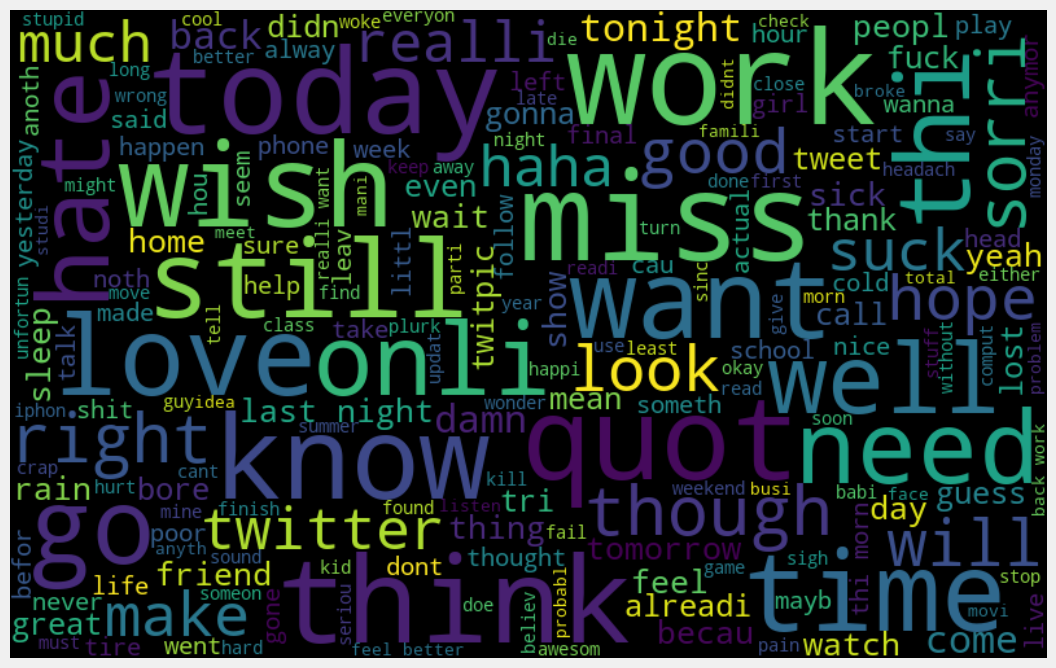

In [98]:
#frequnet word visualization for negetive words
all_word = " ".join([x for x in df['clean_text'][df['Label']==1]])

#Bigger the words more frequent they are
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_word)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [99]:
#extarct the hashtags
def hashtags_extarct(tweet):
    hashtags = []
    for word in tweet:
        ht = re.findall(r"#(\w+)", word)
        hashtags.append(ht)
    return hashtags    

In [100]:
#extract hagtags from non racist/ racist tweets
ht_positive = hashtags_extarct(df['clean_text'][df['Label']==0])
ht_negative = hashtags_extarct(df['clean_text'][df['Label']==1])
 

In [101]:
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

In [102]:
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()), 'Count':list(freq.values())})
d.head()

,Hashtag,Count
0,devun,1
1,alexa,1
2,japan,3
3,skype,2
4,explet,1


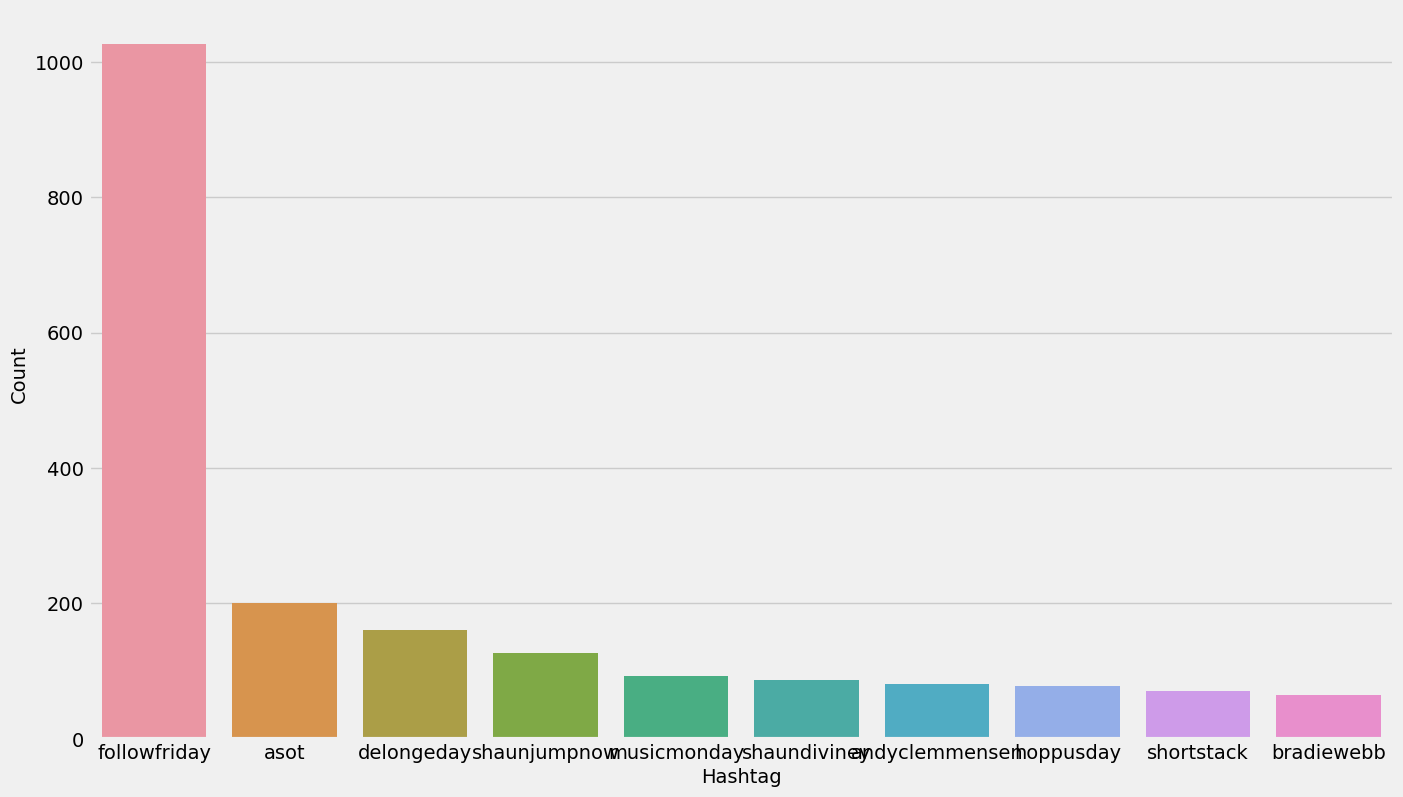

In [103]:
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

In [104]:
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(freq.keys()), 'Count':list(freq.values())})
d.head()

,Hashtag,Count
0,itm,2
1,therapyfail,1
2,ttsc,1
3,gayforpeavi,1
4,fml,24


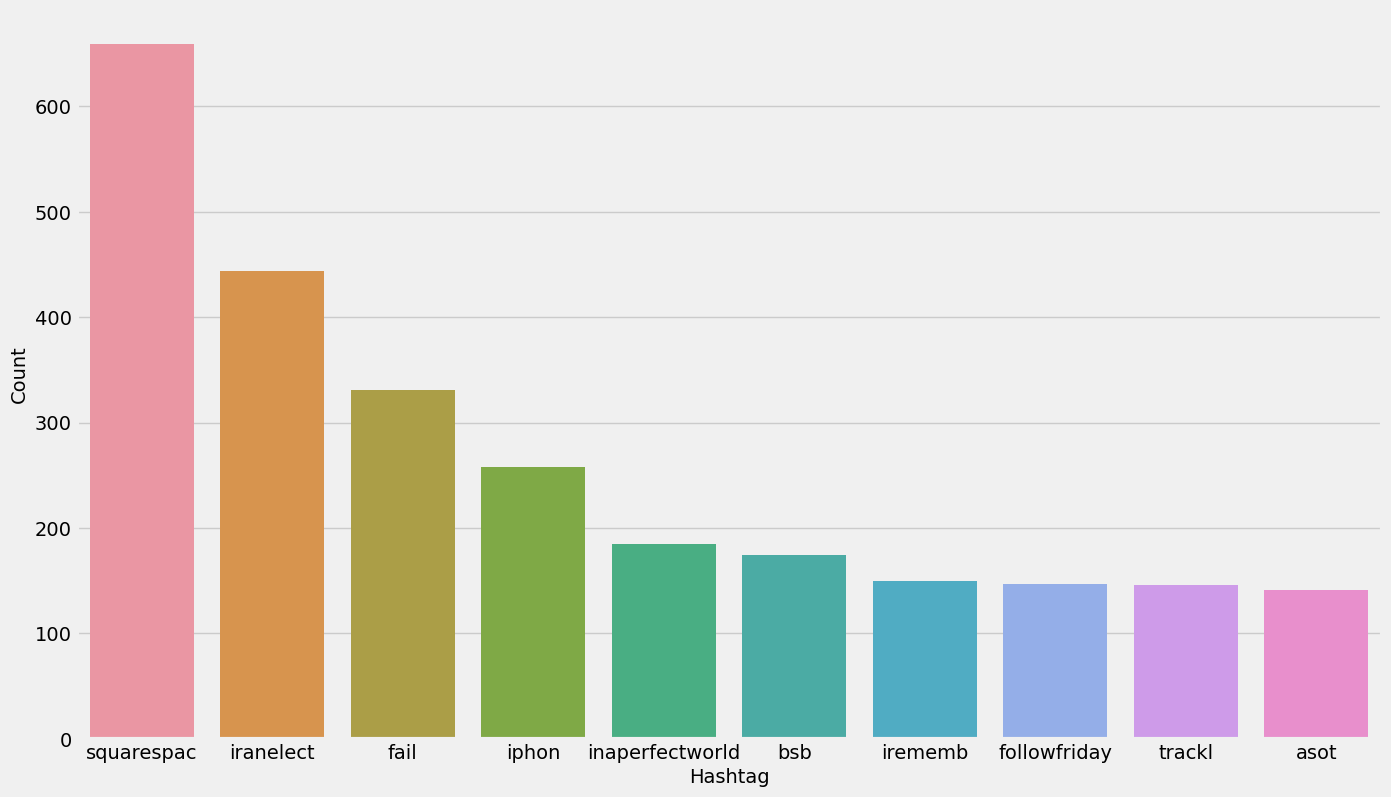

In [105]:
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

INPUT SPLIT

In [106]:
#feature extarction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['clean_text'])

In [107]:
bow[0].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [108]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['Label'], random_state=42, test_size=0.25)

MODEL TRAINING

In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

USING LOGISTICS REGRESSION

In [130]:
#training
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [134]:
#testing
pred = model.predict(x_test)
f1_score(y_test, pred)

0.8820937659091961

In [135]:
accuracy_score(y_test, pred)

0.805633544921875

In [127]:
import pickle

In [128]:
pickle.dump(model,open('model.pkl', 'wb'))

In [131]:
model

LogisticRegression()